# Course 2 Assignment 3

In this assignment we need to plot data and then perform pearson correlation tests

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Loading and preparing data

In [2]:
# show all columns
pd.set_option('display.max_columns', None)
# loading the data from the local file
df = pd.read_csv('data/covid_data.csv')

In [3]:
# prepare data
df.date = pd.to_datetime(df.date)
dfx = df.dropna(subset=['continent'])  # gets rid of summaries for 'world' and 'africa' etc, as I only want data for countries
# the columns I need for this task
cols = ['location', 'date', 'new_cases_per_million','new_deaths_per_million', 'people_fully_vaccinated', 'human_development_index', 'population']
dfx = dfx[cols].dropna()  # getting rid of rows with empty data
# getting rid of rows where new cases and  deaths are below zero (due to error correction I guess?)
dfx = dfx[dfx.new_deaths_per_million >= 0]
dfx = dfx[dfx.new_cases_per_million >= 0]
# limiting it to 2021 which is when vaccinations really got started
dfx = dfx[dfx['date'].dt.year == 2021]
# so as to compare like with like, I'm keeping only countries with human development indices over 0.9
dfx = dfx[dfx.human_development_index > 0.9]
# calculating percentage of population fully vaccinated
dfx['percentage_fully_vaccinated'] = (dfx.people_fully_vaccinated/dfx.population) * 100
dfx.tail()

,location,date,new_cases_per_million,new_deaths_per_million,people_fully_vaccinated,human_development_index,population,percentage_fully_vaccinated
81005,United States,2021-04-25,96.872,0.843,94772329.0,0.926,331002647.0,28.631895
81006,United States,2021-04-26,144.080,1.432,95888088.0,0.926,331002647.0,28.968979
81007,United States,2021-04-27,153.642,1.937,96747454.0,0.926,331002647.0,29.228604
81008,United States,2021-04-28,166.539,2.897,98044421.0,0.926,331002647.0,29.620434
81009,United States,2021-04-29,175.826,2.580,99668945.0,0.926,331002647.0,30.111223


In [4]:
dfx.corr()  # actually gives you the pearson correlations...

,new_cases_per_million,new_deaths_per_million,people_fully_vaccinated,human_development_index,population,percentage_fully_vaccinated
new_cases_per_million,1.000000,0.501205,-0.015528,-0.356064,0.034961,0.001987
new_deaths_per_million,0.501205,1.000000,-0.005459,-0.229044,0.194922,-0.126583
people_fully_vaccinated,-0.015528,-0.005459,1.000000,-0.069816,0.727522,0.318270
human_development_index,-0.356064,-0.229044,-0.069816,1.000000,-0.136102,-0.127988
population,0.034961,0.194922,0.727522,-0.136102,1.000000,0.070931
percentage_fully_vaccinated,0.001987,-0.126583,0.318270,-0.127988,0.070931,1.000000


## Graphing the relationships

I will look at the relationship between the percentage of the population being fully vaccinated and both new cases per million people and new deaths per million people

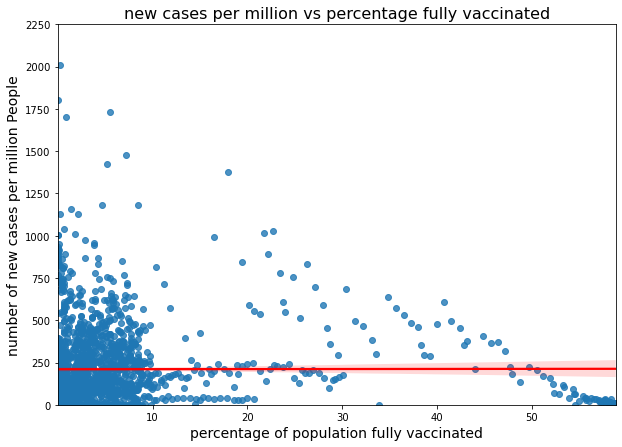

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(0, 2250)
plt.title('new cases per million vs percentage fully vaccinated', size=16)

sns.regplot(data=dfx, x='percentage_fully_vaccinated', y='new_cases_per_million', line_kws={'color':'red'})
plt.xlabel(xlabel='percentage of population fully vaccinated', size=14)
_ = plt.ylabel('number of new cases per million People', size=14)

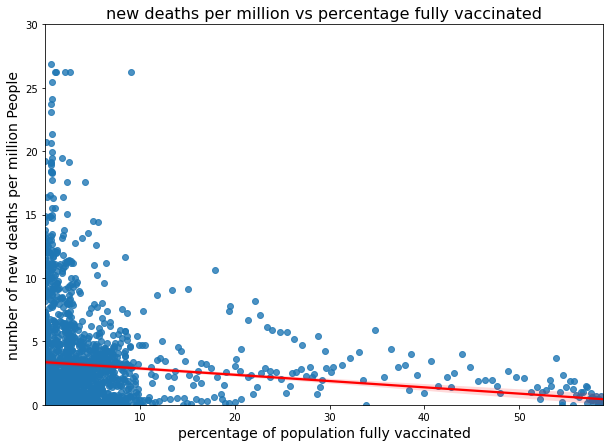

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylim(0, 30)
plt.title('new deaths per million vs percentage fully vaccinated', size=16)

sns.regplot(data=dfx, x='percentage_fully_vaccinated', y='new_deaths_per_million', line_kws={'color':'red'})
plt.xlabel(xlabel='percentage of population fully vaccinated', size=14)
_ = plt.ylabel('number of new deaths per million People', size=14)

## Pearson correlation

The percentage of population fully vaccinated seems to have a negative correlation with the number of new deaths per million people, but no clear correlation with new cases. To test this, I have performed a Pearson correlation.

In [7]:
print('association between new cases per million and percentage fully vaccinated')
r, p = stats.pearsonr(dfx.new_cases_per_million, dfx.percentage_fully_vaccinated)
print(f'Pearson’s correlation coefficient (r): {r}')
print(f'p-value: {p}')
if p > 0.05:
    print('This result is not significant.')
else:
    print('This result is significant')

association between new cases per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): 0.001986621022623444
p-value: 0.9319696119483384
This result is not significant.


In [8]:
print('association between new deaths per million and percentage fully vaccinated')
r, p = stats.pearsonr(dfx.new_deaths_per_million, dfx.percentage_fully_vaccinated)
print(f'Pearson’s correlation coefficient (r): {r}')
print(f'p-value: {p}')
if p > 0.05:
    print('This result is not significant.')
else:
    print('This result is significant')

association between new deaths per million and percentage fully vaccinated
Pearson’s correlation coefficient (r): -0.12658252667510844
p-value: 4.7253038838124575e-08
This result is significant


## Summary

In my sample of countries with a Human Development index greater than 0.9, there is no correlation between the percentage of the population vaccinated and the number of new cases per million people.

However, there is a weakly negative linear correlation between the percentage of the population vaccinated and the number of new deaths per million people (r = -0.127, p<0.001), so that the higher percentage of the population that is vaccinated, the lower the number of new deaths per million people.